In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Imgen

In [2]:
# Create data generators with augmentation for training and validation data
train_datagen = Imgen(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

In [3]:
trainds = train_datagen.flow_from_directory(
    'Training/',
    target_size=(130, 130),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'Training/',
    target_size=(130, 130),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 275 images belonging to 18 classes.
Found 38 images belonging to 18 classes.


In [4]:
c = trainds.class_indices
classes = list(c.keys())
classes

['Cherry',
 'Coffee-plant',
 'Cucumber',
 'Lemon',
 'almond',
 'banana',
 'cardamom',
 'chilli',
 'coconut',
 'cotton',
 'maize',
 'mustard-oil',
 'papaya',
 'pineapple',
 'rice',
 'sugarcane',
 'tomato',
 'wheat']

In [5]:
x,y = next(trainds)
def plotImages(x,y):
    plt.figure(figsize=[11,8])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

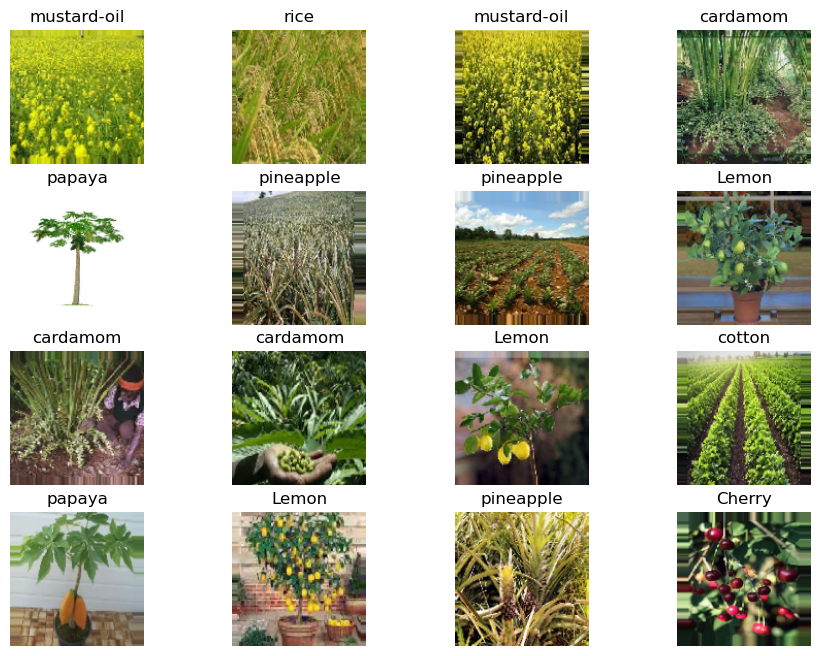

In [6]:
# call the plotImages function
plotImages(x,y)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Define a simple CNN architecture
num_classes = 18

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Corrected Dropout value
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Updated to match num_classes
])

In [9]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [11]:
# Train the model
history = model.fit(trainds,validation_data=validation_generator,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
18/18 [==============================] - 191s 10s/step - loss: 3.6867 - accuracy: 0.0618 - val_loss: 2.8835 - val_accuracy: 0.0789
Epoch 2/50
18/18 [==============================] - 164s 9s/step - loss: 2.8803 - accuracy: 0.0618 - val_loss: 2.8636 - val_accuracy: 0.0789
Epoch 3/50
18/18 [==============================] - 133s 7s/step - loss: 2.8275 - accuracy: 0.0800 - val_loss: 2.7991 - val_accuracy: 0.0789
Epoch 4/50
18/18 [==============================] - 86s 5s/step - loss: 2.7175 - accuracy: 0.1309 - val_loss: 2.7728 - val_accuracy: 0.1579
Epoch 5/50
18/18 [==============================] - 82s 5s/step - loss: 2.5844 - accuracy: 0.1673 - val_loss: 2.6350 - val_accuracy: 0.1579
Epoch 6/50
18/18 [==============================] - 86s 5s/step - loss: 2.3940 - accuracy: 0.2545 - val_loss: 2.6769 - val_accuracy: 0.1842
Epoch 7/50
18/18 [==============================] - 89s 5s/step - loss: 2.3484 - accuracy: 0.3127 - val_loss: 2.5397 - val_accuracy: 0.2895
Epoch 8/50
18/18

In [12]:
# Evaluate yhe model on test data
testds = Imgen(rescale=1./255)
test_generator = testds.flow_from_directory(
    'Testing/',
     target_size=(130, 130),
     batch_size=32,
     class_mode='categorical',
     shuffle=False
)

model.evaluate(test_generator)

Found 179 images belonging to 18 classes.
6/6 [==============================] - 36s 6s/step - loss: 4.6346 - accuracy: 0.3855


[4.634603500366211, 0.3854748606681824]

<Figure size 640x480 with 0 Axes>

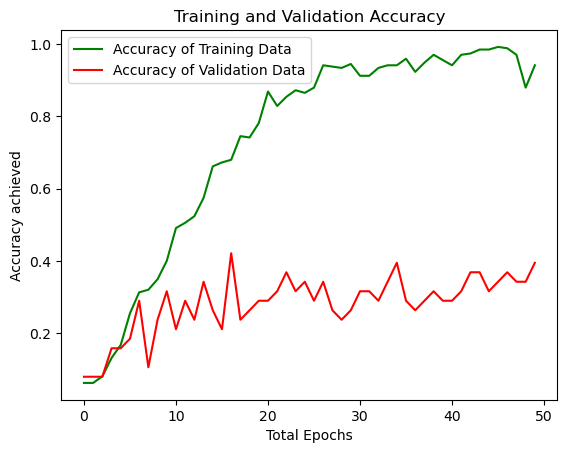

<Figure size 640x480 with 0 Axes>

In [13]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

C:\Users\royalgifts\AppData\Local\Temp\ipykernel_3924\858420638.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


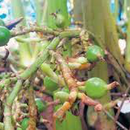

In [15]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("image (1).jpg")
size = (130, 130)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [16]:
prediction = model.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 12s 12s/step
[[9.5609911e-22 2.7850802e-09 5.2052107e-20 1.5401424e-06 1.0503537e-29
  2.8086086e-03 1.1653636e-26 1.3012181e-26 9.0557461e-13 4.5593312e-12
  3.4579178e-14 2.4747379e-26 3.4614841e-05 8.5732636e-14 8.6445492e-24
  9.9715519e-01 7.3874394e-19 9.1946471e-29]]
15


In [17]:
model.save('model1.h5')